# Explorative Data Analysis (EDA): Superstore Dataset
Background

The prospects for growth in demand of furniture products has been on an upward trajectory informed by increased disposable income and changing lifestyle preferences towards stylish products. In the United States, this positive outlook of the market has attracted not only further investment in the market from the big firms in the sector, but also seen entrant of small and medium enterprises. Additionally, the rapidly changing E-commerce is forcing firm to rethink their strategies to maintain an edge in the midst of cut throat competition. Superstores that deals in furniture products across all the States in the USA introduced discount to guarantee price leadership, maintain market share and increase revenue and profits.

Business case;

The project aim at evaluating the value of discounting furniture prices towards the superstore sales and profit.

Objectives;
-Time Series Analysis to evaluate the trends in superstore sales, profit, or discount between 2014 and 2017
-To analyze trend in total sales per state
-To anlyze market segments 
-To determine the relationship between discount and profit.

Data sources
The project will be based on super store data of 2014 to 2018 downloaded from kaggle




In [1]:
# loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [3]:
# authorization module to access files from from my laptop operating system
import os     

# establish the current working directory location
os.getcwd()

'C:\\Users\\HP\\Documents\\Flatiron\\phase_1_project'

In [4]:
# loading excel file into panda dataframe without the first column
df = pd.read_excel("Sample - Superstore.xls", index_col=0)

# to check if the loading was successful
# get the first five rows of the file
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# prints out the column names
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# checking for the number of rows and columns 
df.shape

(9994, 20)

In [7]:
#interrogate data edges
df.tail ()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
# checking for the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [48]:
# key observations from data overview
# the data set has no missing values
# most data type is in form of object

In [49]:
# count to see the number and frequency of product categories
product_count_per_category = df.groupby('Category').size().reset_index(name='Product_Count')

# Displaying the result
print(product_count_per_category)

          Category  Product_Count
0        Furniture           2121
1  Office Supplies           6026
2       Technology           1847


In [10]:
# runng descriptive statistics of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# Observations from the descriptive statistics
# the data generated decriptives for float and integer data
# postal code statistics are not necessary since they dont make sense!
# Average sales was 229.858 with the minimum being 0.444 and max 22638 dollars
# Average quantity was 3.79 units ragnging from a low of 1 and maximum of 14 products
# Average disount offered was 0.156 percent ranging between a min of 0.0 and max of 0.8 percent
# Average profit was 28.657 ranging from a low of -6599(loss) and maximum of 8399.976 dollars

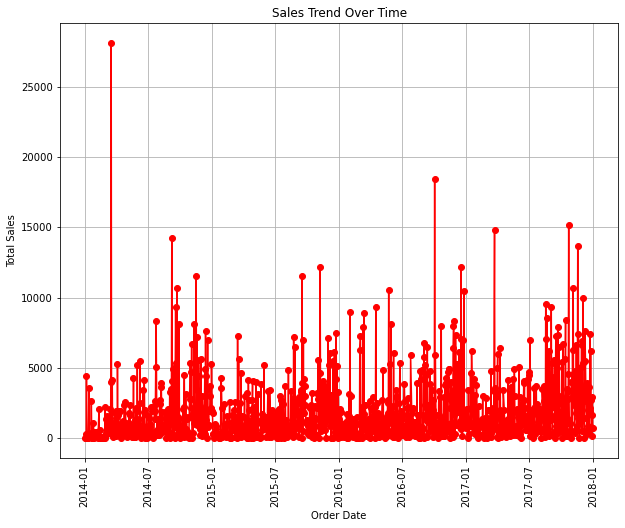

In [12]:
# Visualizing trends in sales over the years
# first is to tranform 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# grouping 'Order Date' and calculate the total sales for each date
sales_trend = df.groupby('Order Date')['Sales'].sum()

# generating sales trend plot
plt.figure(figsize=(10, 8))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='r')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [13]:
# observation from trends in sales
# the data is split into segments of seven months
# sales has bee oscillating between 0 and slightly less than 15,000
# execption of two periods when sales overshort to over 25,000 and slighlt under 20,000
# around April of 2014 and May of 2016

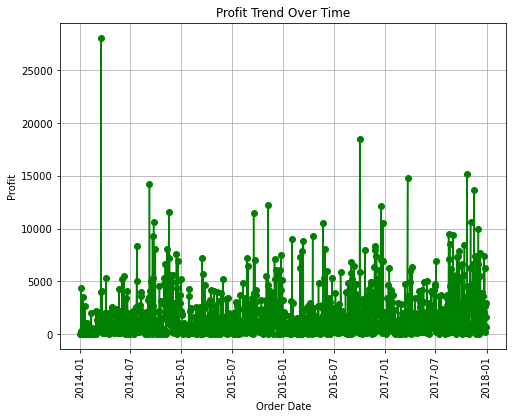

In [14]:
# Plot the sales trend
plt.figure(figsize=(8, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='g')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.title('Profit Trend Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [15]:
# observation from trends in sales
# the data is split into segments of seven months
# profit has been oscillating between 7000 and 0 with most concentrated below 5,000
# execption of two periods when sales overshort to over 25,000 and slighlt under 20,000
# around April of 2014 and May of 2016

In [16]:
# Segment customer categories for further analysis
segment_data = df.groupby('Segment').agg({
    'Sales': 'mean',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

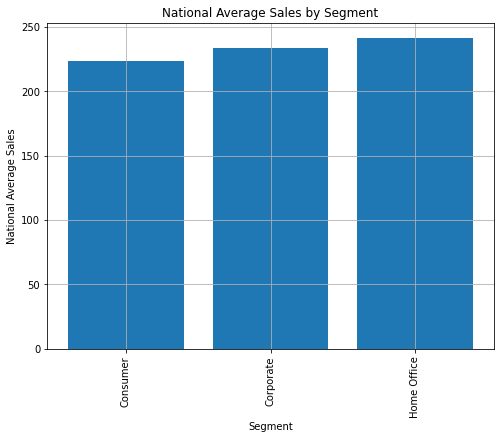

In [17]:
# plotting segmented data 
plt.figure(figsize=(8, 6))
plt.bar(segment_data['Segment'], segment_data['Sales'])
plt.xlabel('Segment')
plt.ylabel('National Average Sales')
plt.title('National Average Sales by Segment')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [20]:
# observations from the segmented data
# there are three segment of superstores customers 
# all the segments have sales of over 200 aggregate 
# with consumer segment having the lowest share
# and home office having the highest average

In [38]:
# grouping segment and state by county to combined analysis
# Geographic analysis
state_data = df.groupby('State').agg({
    'Sales': 'mean',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

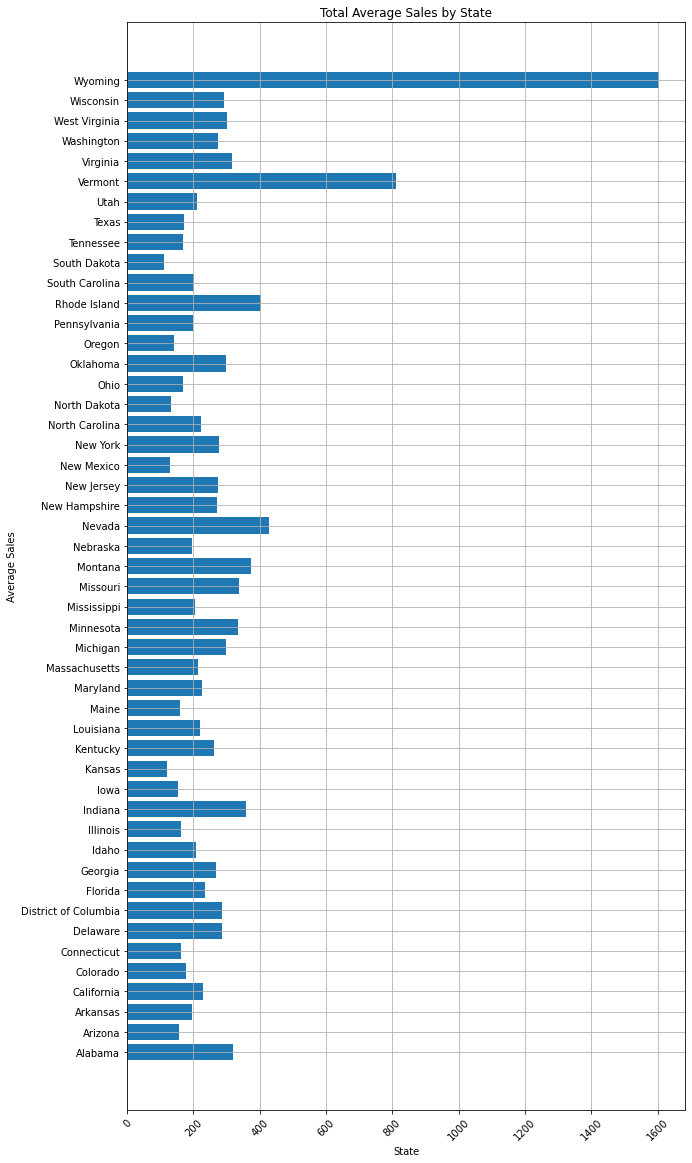

In [41]:
# estimate the distribution of sales per state to see the one with the highest market 
# average sales across the States
# creating a plot of average sales per state
plt.figure(figsize=(10, 20))
plt.barh(state_data['State'], state_data['Sales'])
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.title('Total Average Sales by State')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
# key observations from the sales by state
# Wyoming command the largest market share followed by Vermont and Nevada states 
# with average sale of over 400 and 1,600
# 14 states had sales below less that 200 and below aggregate mean of 229
# South Darkota and Kansas has the least market share 

In [42]:
# assessing the way these variables are related and strength of relationship
# correlation between the quantity of products sold, discount offered and profit
correlation_matrix = df[['Profit', 'Discount', 'Sales']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Profit  Discount     Sales
Profit    1.000000 -0.219487  0.479064
Discount -0.219487  1.000000 -0.028190
Sales     0.479064 -0.028190  1.000000


In [43]:
# observation from the correlation data
# profit has a weak and negative correlation with discout;
# this implies that disount eats on profit as 
# increase in discount relates to a drop in profit
# Profit has a moderately stronger correlation (0.479064) with sales
# this implies that increased sales relate to moderate increa in profits
# discount has a weak negative relation with sales;
# this implies that increase in discount relates to marginal decrease in sales

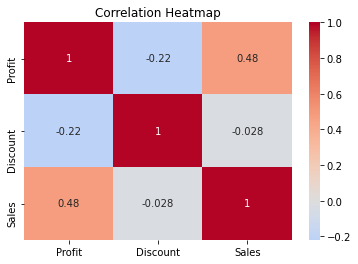

In [44]:
# Plotting a correlation heatmap for Sales, Discount and profit for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# Conclusion
# discount, sales and profit in the superstore follow same trends under the review period
# Wyoming command the largest market share followed by Vermont and Nevada states
# South Darkota and Kansas has the least market share 
# home office remain the largest market segnment although the difference with 
# cosnumer and corporate is marginal
# disount offered appear to depress both profit and sales 

In [46]:
# Recommendations
# There is portential to improve market share of South Darkota and Kansas  
# to about the aggregate market price. Strategies to promote the superstore based on market leadership (customer centric)
# in these states is highly recommended
# There is need to promote all customer segments as they appear to have equal potential
# Disount offered in all the areas need to be eliminated as its appear to affect the 
# business sales and profits negatively. Alternatively, the superstore need to consider
# havong more targeted discounts for specific products and specific states

          Category  Product_Count
0        Furniture           2121
1  Office Supplies           6026
2       Technology           1847
